## Import Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution of Classes per Dataset

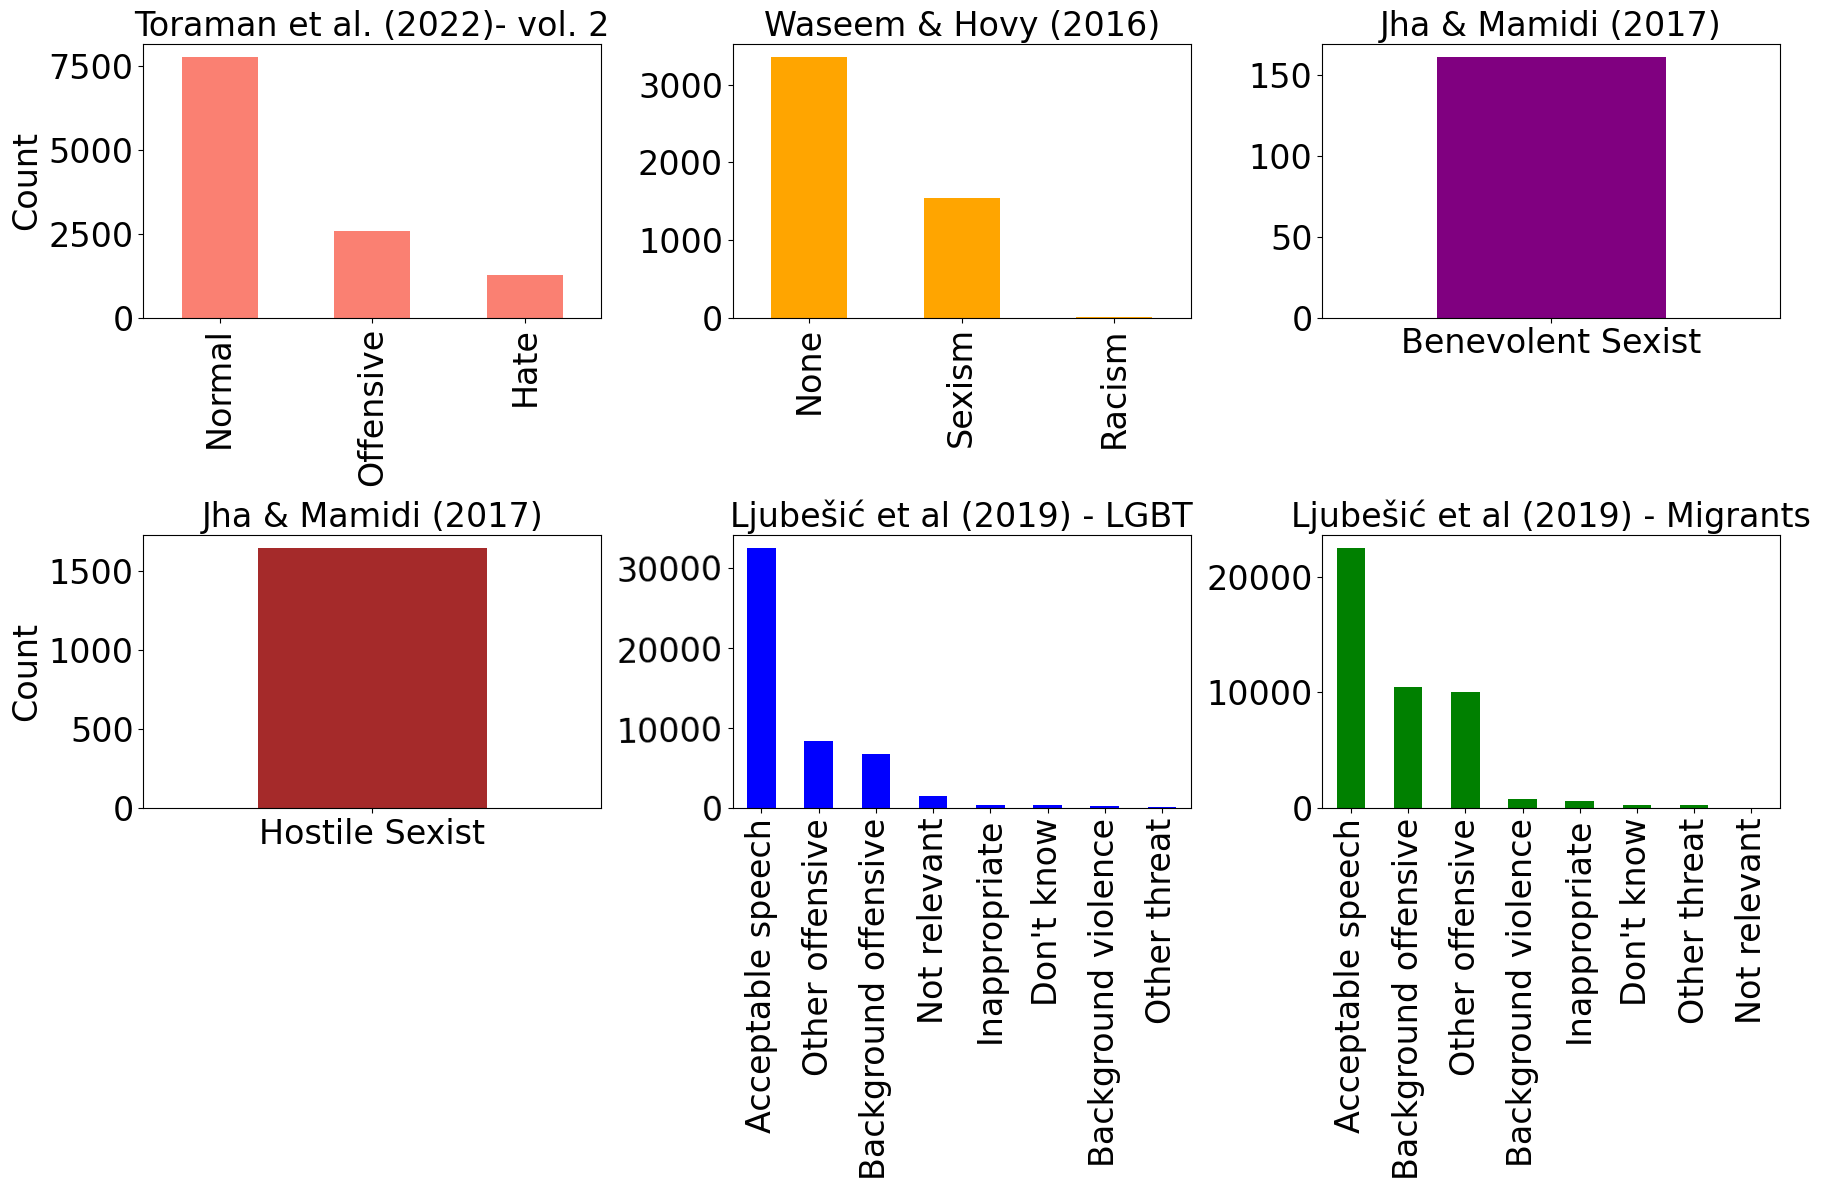

In [6]:
# Load the first dataset
file_path1 = '/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/Data_UserID/hate_speech_dataset_v2.csv'
df1 = pd.read_csv(file_path1)

# Load the second dataset
file_path2 = '/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/Data_UserID/twitter_data_waseem_hovy.csv'
df2 = pd.read_csv(file_path2)

# Load the third dataset
file_path3 = '/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/Data_UserID/benevolent_sexist.tsv'
df3 = pd.read_csv(file_path3, sep='\t')

# Load the fourth dataset
file_path4 = '/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/Data_UserID/hostile_sexist.tsv'
df4 = pd.read_csv(file_path4, sep='\t')

# Load the fifth dataset
file_path5 = "/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/FRENK/lgbt-en.csv"
df5 = pd.read_csv(file_path5)

# Load the sixth dataset
file_path6 = "/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/FRENK/migrants-en.csv"
df6 = pd.read_csv(file_path6)


# Replace numerical labels with strings for the first  dataset
label_mapping = {0: 'Normal', 1: 'Offensive', 2: 'Hate'}
df1['HateLabel'] = df1['HateLabel'].map(label_mapping)

# Calculate distributions for each dataset
label_distribution1 = df1['HateLabel'].value_counts()
label_distribution2 = df2['annotation'].map({0: 'Racism', 1: 'Sexism', 2: 'None'}).value_counts()


# Count the number of rows for the additional datasets
label_distribution3 = pd.Series({'Benevolent Sexist': len(df3)})
label_distribution4 = pd.Series({'Hostile Sexist': len(df4)})


label_distribution5 = df5['annotation_type'].value_counts()
label_distribution6 = df6['annotation_type'].value_counts()


# Plot the distributions side by side
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot for the first dataset
label_distribution1.plot(kind='bar', color='salmon', ax=axes[0, 0])
axes[0, 0].set_title('Toraman et al. (2022)- vol. 2',  fontsize=24)
axes[0, 0].set_xlabel('', fontsize=24)
axes[0, 0].set_ylabel('Count', fontsize=24)
axes[0, 0].tick_params(axis='x', labelrotation=90, labelsize=24)  # Adjust x-axis tick label size
axes[0, 0].tick_params(axis='y', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size


# Plot for the second dataset
label_distribution2.plot(kind='bar', color='orange', ax=axes[0,1])
axes[0, 1].set_title('Waseem & Hovy (2016)',  fontsize=24)
axes[0, 1].set_xlabel('', fontsize=24)
axes[0, 1].set_ylabel('', fontsize=24)
axes[0, 1].tick_params(axis='x', labelrotation=90, labelsize=24)  # Adjust x-axis tick label size0
axes[0, 1].tick_params(axis='y', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size


# Plot for the third dataset
label_distribution3.plot(kind='bar', color='purple', ax=axes[0, 2])
axes[0, 2].set_title('Jha & Mamidi (2017)',  fontsize=24)
axes[0, 2].set_xlabel('',  fontsize=24)
axes[0, 2].set_ylabel('',  fontsize=24)
axes[0, 2].tick_params(axis='x', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size
axes[0, 2].tick_params(axis='y', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size

# Plot for the fourth dataset
label_distribution4.plot(kind='bar', color='brown', ax=axes[1, 0])
axes[1, 0].set_title('Jha & Mamidi (2017)',  fontsize=24)
axes[1, 0].set_xlabel('',  fontsize=24)
axes[1, 0].set_ylabel('Count',  fontsize=24)
axes[1, 0].tick_params(axis='x', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size
axes[1, 0].tick_params(axis='y', labelrotation=0, labelsize=24)  # Adjust x-axis tick label size

# Plot for the fifth dataset (df5)
label_distribution5.plot(kind='bar', color='blue', ax=axes[1,1])
axes[1,1].set_title('Ljubešić et al (2019) - LGBT', fontsize=24)
axes[1,1].set_xlabel('', fontsize=24)
axes[1,1].set_ylabel('', fontsize=24)
axes[1,1].tick_params(axis='x', labelrotation=90, labelsize=24)
axes[1,1].tick_params(axis='y', labelrotation=1, labelsize=24)

# Plot for the sixth dataset (df6)
label_distribution6.plot(kind='bar', color='green', ax=axes[1,2])
axes[1,2].set_title('Ljubešić et al (2019) - Migrants', fontsize=24)
axes[1,2].set_xlabel('', fontsize=24)
axes[1,2].set_ylabel('', fontsize=24)
axes[1,2].tick_params(axis='x', labelrotation=90, labelsize=24)
axes[1,2].tick_params(axis='y', labelrotation=0, labelsize=24)


# Adjust layout
plt.tight_layout()
plt.show()

## Analysis of a Small Portion of Manually Annotated Data

From the 6 available datasets we manually extracted users' and tweets' information :

Gender, Age, Area, Description, Followers, Verified_Followers, Following, Lists, Class,Parent_tweet, Hastags, Tags, Reposted


This was done for experimental purposes in order to assess the possibilities of further explorations in the next steps of the study.

## Load the dataset

In [7]:
# Load your dataset
df = pd.read_csv('/data/ARENAS_Automatic_Extremist_Analysis/ARENAS_Automatic_Extremist_Analysis/Data/Data_UserID/metadata/tweet-user_analysis.csv')

## Analysis of Followers, Verified Followers, Following and Lists 

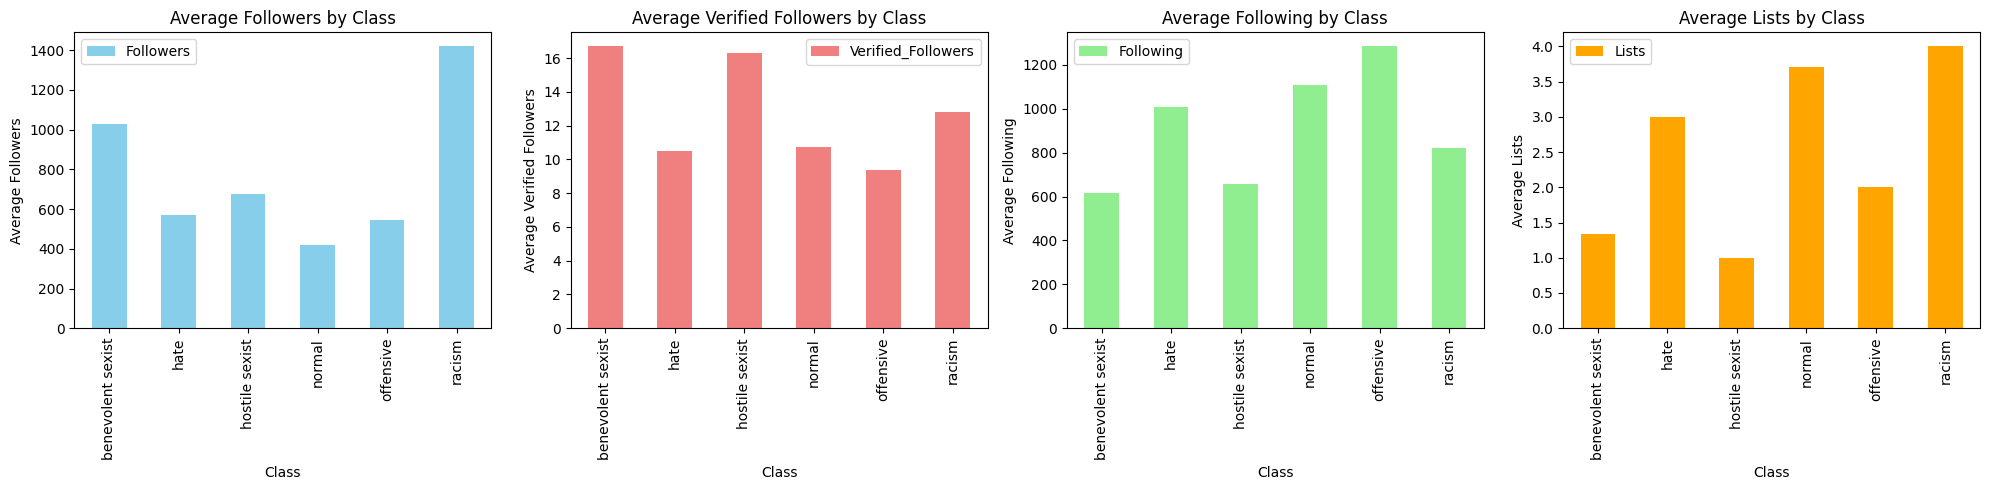

In [8]:
# Convert columns to numeric (if they are not already)
df[['Followers', 'Verified_Followers', 'Following', 'Lists']] = df[['Followers', 'Verified_Followers', 'Following', 'Lists']].apply(pd.to_numeric, errors='coerce')

# Group by user class and calculate average engagement metrics
engagement_metrics = df.groupby('Class').agg({
    'Followers': 'mean',
    'Verified_Followers': 'mean',
    'Following': 'mean',
    'Lists': 'mean'
}).reset_index()

# Plot the average number of followers, verified followers, following, and lists for different user classes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

engagement_metrics.plot(kind='bar', x='Class', y='Followers', ax=axes[0], color='skyblue')
axes[0].set_title('Average Followers by Class')
axes[0].set_ylabel('Average Followers')

engagement_metrics.plot(kind='bar', x='Class', y='Verified_Followers', ax=axes[1], color='lightcoral')
axes[1].set_title('Average Verified Followers by Class')
axes[1].set_ylabel('Average Verified Followers')

engagement_metrics.plot(kind='bar', x='Class', y='Following', ax=axes[2], color='lightgreen')
axes[2].set_title('Average Following by Class')
axes[2].set_ylabel('Average Following')

engagement_metrics.plot(kind='bar', x='Class', y='Lists', ax=axes[3], color='orange')
axes[3].set_title('Average Lists by Class')
axes[3].set_ylabel('Average Lists')

plt.tight_layout()
plt.show()


## Analysis of Hastags per Class

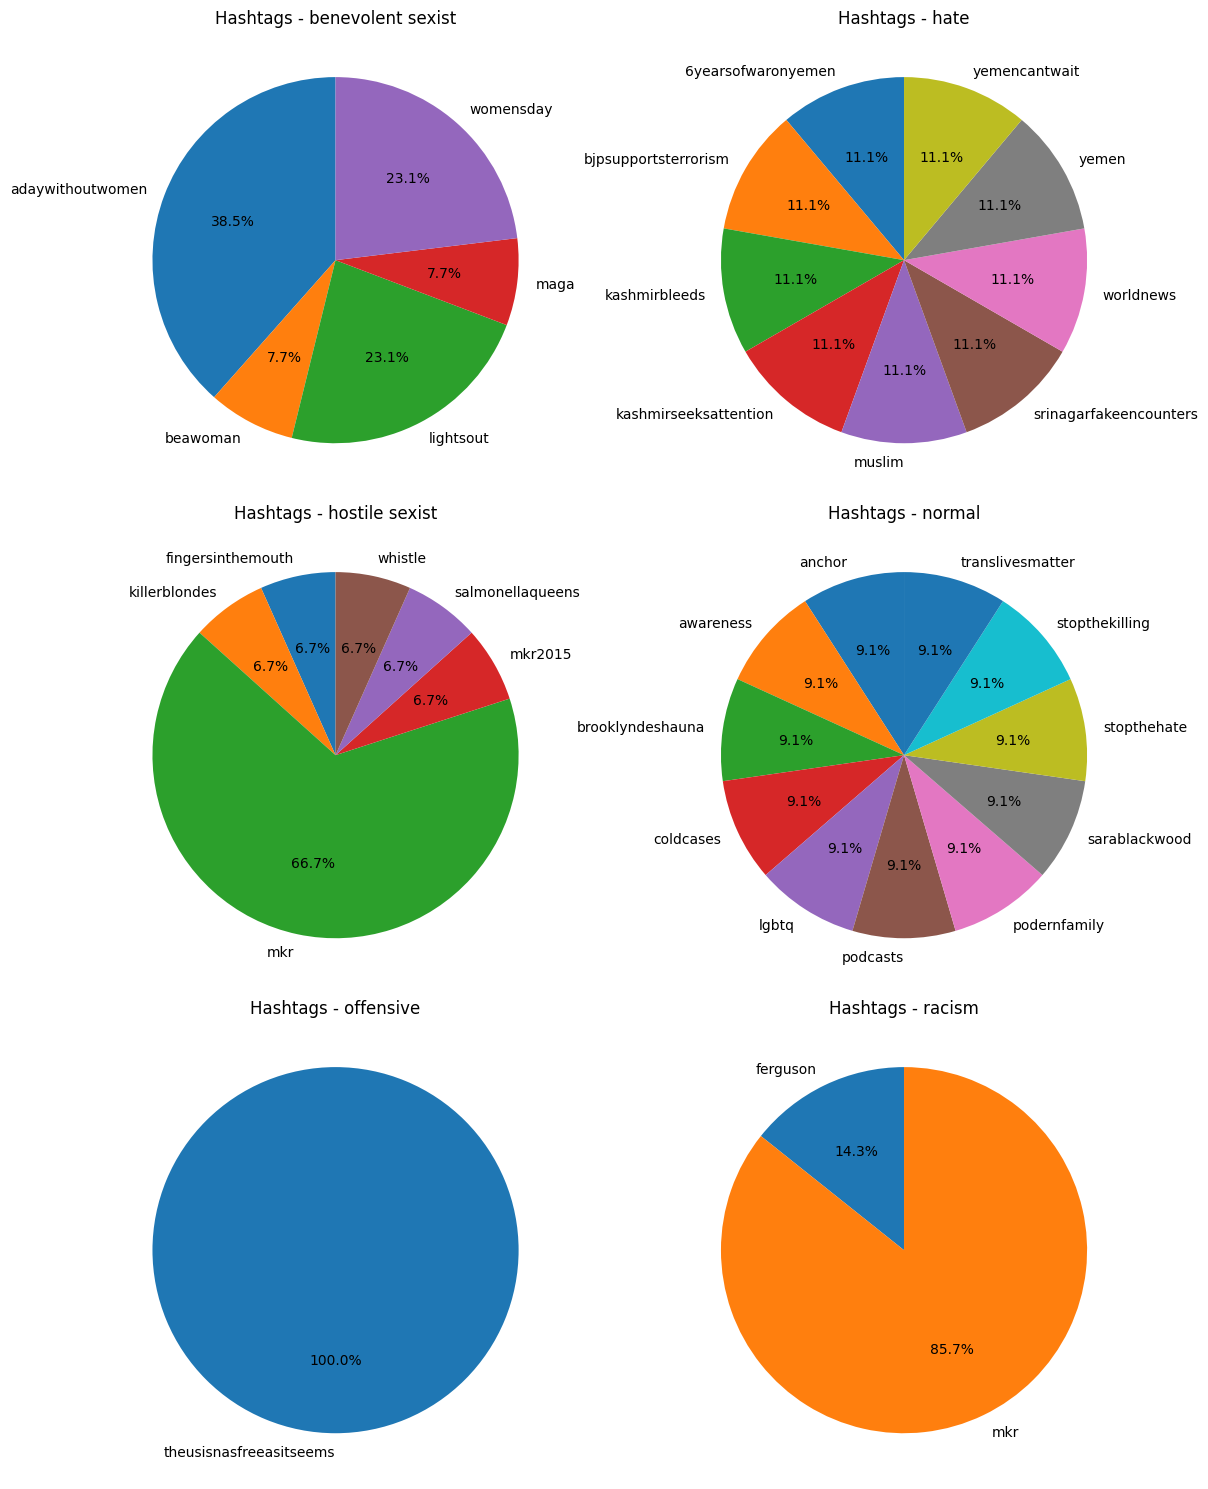

In [9]:
# Extract hashtags from 'Hastags' column in a case-insensitive manner
df['Hastags'] = df['Hastags'].str.lower()
hashtags = df['Hastags'].str.extractall(r'(?i)#(\w+)').reset_index()
hashtags.columns = ['index', 'match', 'Hashtags']

# Merge with the original DataFrame to associate hashtags with user classes
df_hashtags = pd.merge(hashtags, df[['Class']], left_on='index', right_index=True)

# Count the frequency of each hashtag for each user class
hashtag_counts_by_class = df_hashtags.groupby(['Class', 'Hashtags']).size().reset_index(name='Count')

# Pivot the table for better visualization
hashtag_pivot = hashtag_counts_by_class.pivot(index='Class', columns='Hashtags', values='Count').fillna(0)

# Plot pie charts for each user class, 2 columns per row
fig, axes = plt.subplots(nrows=(len(hashtag_pivot) + 1) // 2, ncols=2, figsize=(12, 5 * ((len(hashtag_pivot) + 1) // 2)))

for idx, (user_class, row) in enumerate(hashtag_pivot.iterrows()):
    total_count = row.sum()
    if total_count > 0:
        percentages = row / total_count * 100
        percentages = percentages[percentages > 0]
        
        if not percentages.empty:
            ax = axes[idx // 2, idx % 2]
            percentages.plot(kind='pie', autopct='%1.1f%%', ax=ax, startangle=90)
            ax.set_title(f'Hashtags - {user_class}')
            ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()